---
# <center> *Machine Learning*
## <center> Clustering: KNN
---

# Introduction to K-Nearest Neighbors (KNN) Classification

In this notebook, we will explore the **K-Nearest Neighbors (KNN)** algorithm — a simple yet powerful method for classification and regression.

KNN is a **non-parametric, instance-based learning algorithm**:
- It doesn’t build a model during training.
- Instead, it memorizes the dataset and makes predictions by comparing new inputs to stored examples.

---

## What is KNN?

The basic idea:

- When we receive a new data point, we look at the **k closest points** (neighbors) from the training data.
- For **classification**:
  - The predicted class is the majority class among those neighbors.
- For **regression**:
  - The predicted value is the average of neighbors’ values.

---

## Example scenario:

Suppose we have a dataset of points labeled as belonging to either Class A or Class B.

When a new point arrives:

1️⃣ We compute its distance to all training points.  
2️⃣ We select the $k$ nearest points (neighbors).  
3️⃣ We count the number of neighbors in each class.  
4️⃣ We assign the new point to the most frequent class among its neighbors.

---

## Mathematical formulation

### Distance metric:

The most common distance measure is **Euclidean distance**:

$$
d(x, x') = \sqrt{\sum_{i=1}^d (x_i - x'_i)^2}
$$

where:
- $x, x'$ are two points in $d$-dimensional space.

---

### Prediction rule (classification):

Given a dataset:

$$
\{ (x^{(1)}, y^{(1)}), (x^{(2)}, y^{(2)}), \dots, (x^{(n)}, y^{(n)}) \}
$$

where $x^{(i)}$ are the features and $y^{(i)}$ are the class labels.

For a new point $x_{\text{new}}$:
- Find the $k$ nearest points to $x_{\text{new}}$.
- Let $N_k(x_{\text{new}})$ denote this set.
- Predict:

$$
\hat{y} = \text{majority_vote}\{ y^{(i)} : x^{(i)} \in N_k(x_{\text{new}}) \}
$$

---

## Characteristics:

- **Lazy learning:** no training phase, all computation happens at prediction time.
- **Non-parametric:** no assumptions about data distribution.
- Sensitive to:
  - Choice of $k$.
  - Distance metric.
  - Scale of features (important to normalize).

---

This introduction prepares us for the next step:  
We’ll generate example data, visualize it, and go through the KNN algorithm step-by-step.


## Step 1: Generate Example Data for KNN

We will create a synthetic dataset for classification:

- Two classes
- Two features (for easy visualization)
- Randomly generated points clustered around two centers

This will help us visualize how KNN makes decisions.


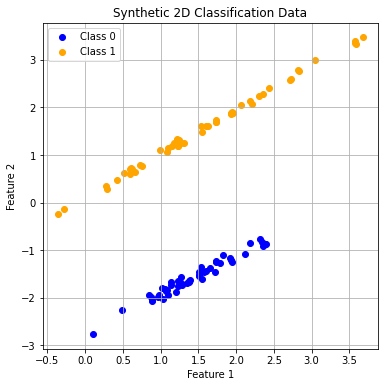

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

# Generate synthetic 2D classification dataset
X, y = make_classification(
    n_samples=100,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    class_sep=1.5,
    random_state=42
)

# Plot the dataset
plt.figure(figsize=(6, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='orange', label='Class 1')
plt.title("Synthetic 2D Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


### What we did:

- Created a dataset with 100 points, 2 features, and 2 classes.
- The two classes are separated enough to show clear clusters.
- This is a good example for illustrating KNN because we can see "nearest neighbors" visually.

---

Next, we will go step by step through the KNN prediction process:
- Compute distances
- Select $k$ nearest neighbors
- Predict the class by majority vote


## Step 2: KNN Prediction Logic

To classify a new point $x_{\text{new}}$, KNN does the following:

1️⃣ **Compute distances** between $x_{\text{new}}$ and all training points.

2️⃣ **Find $k$ nearest neighbors**:  
Select the $k$ training points with the smallest distances.

3️⃣ **Predict the class**:  
Take a majority vote among the $k$ neighbors’ class labels.

---

In this step, we will manually compute the Euclidean distance for a test point and visualize it.


In [ ]:
def Euclidian_distance(A, B):
    """
    A = [1, 3, 5]
    B = [2, 6, 7]
    """
    sum_diff = 0
    for i in range(0, len(A)):
        sum_diff = sum_diff + (A[i] - B[i]) ** 2
        
    return np.sqrt(sum_diff)

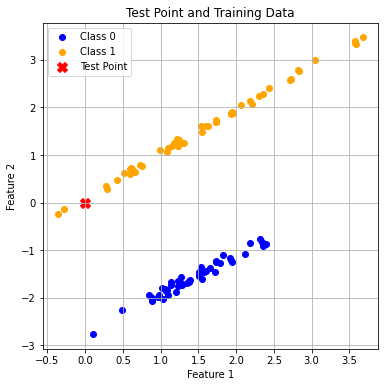

In [18]:
# Select a test point (for demonstration)
x_new = np.array([0, 0])

# Compute Euclidean distance from test point to each training point
distances = np.linalg.norm(X - x_new, axis=1)

# Plot training data and test point
plt.figure(figsize=(6, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='orange', label='Class 1')
plt.scatter(x_new[0], x_new[1], color='red', marker='X', s=100, label='Test Point')
plt.title("Test Point and Training Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [19]:
distances

array([2.13718493, 2.22972971, 4.27888318, 2.14151914, 2.13434444,
       2.02068899, 2.09614391, 0.93722786, 2.12552196, 2.69836676,
       2.07483123, 2.12773629, 1.8117295 , 3.76403419, 4.8944615 ,
       2.14140096, 2.04635984, 0.93768686, 1.51666737, 3.02789766,
       2.1587646 , 4.89499032, 2.54034718, 1.47786313, 4.93624401,
       1.07571189, 2.2856481 , 2.15935076, 2.31053434, 2.54575138,
       2.01181689, 2.3720711 , 3.73793329, 2.17206451, 2.22994641,
       2.09964754, 3.96642426, 2.26480375, 2.10770124, 2.52549721,
       3.05383298, 0.9168608 , 0.62976509, 2.43034634, 2.19152268,
       0.30878288, 2.05582584, 2.16139751, 2.27791541, 2.30869868,
       1.71355066, 2.42604632, 2.22457355, 2.15282258, 2.16776142,
       2.7138681 , 2.25311107, 1.71583527, 0.8384977 , 2.43791758,
       1.80552837, 2.67577766, 1.80266196, 2.13659579, 2.25760414,
       3.95261248, 3.21216997, 1.78192877, 2.48104021, 2.14246143,
       1.59043954, 2.23879147, 0.41110225, 2.13764471, 2.76503

### Explanation:

- The red "X" is the test point $x_{\text{new}} = [0, 0]$.
- We computed the Euclidean distance between this point and every training example.

---

Next, we will:
- Sort the distances
- Select the $k$ nearest points
- Predict the test point’s class based on a majority vote.


## Step 3: Select $k$ Neighbors and Predict the Class

Let’s choose $k = 5$.

Process:
1️⃣ **Sort distances** to find the indices of the 5 nearest neighbors.

2️⃣ **Look up their labels**.

3️⃣ **Predict** by taking the most common label (majority vote).


In [3]:
k = 5

# Find indices of the k smallest distances
neighbor_indices = np.argsort(distances)[:k]

# Get their labels
neighbor_labels = y[neighbor_indices]

# Predict the majority class
from collections import Counter
prediction = Counter(neighbor_labels).most_common(1)[0][0]

print(f"Indices of nearest neighbors: {neighbor_indices}")
print(f"Labels of nearest neighbors: {neighbor_labels}")
print(f"Predicted class for test point: {prediction}")


Indices of nearest neighbors: [45 72 82 78 42]
Labels of nearest neighbors: [1 1 1 1 1]
Predicted class for test point: 1


### Explanation:

- We sorted all distances from the test point to training points.
- We selected the 5 points with the smallest distances.
- We counted their labels to determine the most frequent class.

---

This is exactly how **KNN makes predictions** — no training phase, just compare and vote.

Next, we will generalize this into a reusable function that can classify any test point.


## Step 4: Build a Reusable KNN Classifier Function

Now we’ll create a Python function that:

- Takes a test point (or multiple points),
- Computes distances to all training points,
- Selects the $k$ nearest neighbors,
- Predicts the class by majority vote.

This makes it easy to classify any new data.


In [4]:
from collections import Counter
import numpy as np

def knn_predict(X_train, y_train, x_query, k=5):
    """
    Predict the class of a single test point x_query using KNN.

    Parameters:
    X_train: training features (n_samples x n_features)
    y_train: training labels (n_samples,)
    x_query: test point (1 x n_features)
    k: number of neighbors to use

    Returns:
    predicted class label
    """
    # Compute distances
    distances = np.linalg.norm(X_train - x_query, axis=1)
    
    # Find k nearest neighbors
    neighbor_indices = np.argsort(distances)[:k]
    neighbor_labels = y_train[neighbor_indices]
    
    # Majority vote
    prediction = Counter(neighbor_labels).most_common(1)[0][0]
    return prediction


### Explanation:

This function is a **basic but complete KNN classifier for a single test point**.

- Input: training data, labels, query point, k
- Output: predicted class label
- Key logic:
  1. Compute distances.
  2. Sort and get $k$ neighbors.
  3. Majority vote.

---

Next: let’s **test this function on a few different points and visualize the predictions**.


Test point 1 [0 0] predicted class: 1
Test point 2 [2 2] predicted class: 1
Test point 3 [-2 -2] predicted class: 0


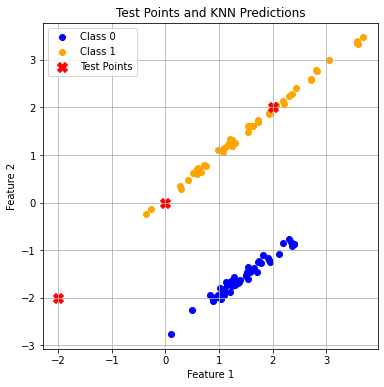

In [5]:
# Define a few new test points
test_points = np.array([
    [0, 0],
    [2, 2],
    [-2, -2]
])

# Predict and display results
for i, xq in enumerate(test_points):
    pred = knn_predict(X, y, xq, k=5)
    print(f"Test point {i+1} {xq} predicted class: {pred}")

# Optional visualization
plt.figure(figsize=(6, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='orange', label='Class 1')
plt.scatter(test_points[:, 0], test_points[:, 1], color='red', marker='X', s=100, label='Test Points')
plt.title("Test Points and KNN Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


# Practical Considerations for Using KNN

Before applying KNN in real scenarios, it’s important to think about a few key factors that affect its performance:

---

## Choosing $k$

- $k=1$: very flexible (perfectly fits the training data) but **high variance** (can overfit and be noisy).
- Large $k$: smoother predictions (averages over more neighbors) but can **underfit** (miss fine structure).

### Best practice:
- Use **cross-validation** to choose $k$.
- A small odd value like $k=3$, $k=5$, or $k=7$ often works well for balanced binary classification.
- Avoid setting $k$ too large relative to dataset size.

---

## Distance metric

KNN depends heavily on the **distance measure**:

- Most common: **Euclidean distance**.
- Alternatives: Manhattan distance, Minkowski distance, etc.
- If features have very different scales (e.g. age vs income), you must **standardize or normalize** them first.

---

## Curse of dimensionality

- In high-dimensional spaces, distances become less meaningful.
- KNN works best with **moderate numbers of features** (low dimensions) or when features have been carefully selected or reduced (e.g. with PCA).

---

## Weighted KNN

Instead of equal votes from neighbors, we can:
- **Weight neighbors by distance** (closer neighbors have more influence).
- Many libraries (including `scikit-learn`) allow weighted voting easily.

---

## Summary:

- **$k$ matters:** control complexity and generalization.
- **Scale matters:** always normalize or standardize features.
- **Distance matters:** choose metric carefully.
- **Dimensionality matters:** avoid blindly applying KNN to high-dimensional data.

---

We now understand both **how KNN works** and **how to make good design choices in practice**.

Next: We will use `scikit-learn`’s `KNeighborsClassifier` in an exercise.


# Additional Example: KNN on Overlapping Clusters

In this example, we’ll:

- Create two clusters that overlap.
- Intentionally add some “interlopers” (points from each class inside the other).
- Fit a KNN classifier and **visualize the decision boundary**.

This helps illustrate how KNN behaves when the decision is not perfectly clear — and how $k$ affects that decision.

---

Even though KNN is not a clustering algorithm, it can "draw a line" (or surface) that separates groups based on proximity to neighbors.


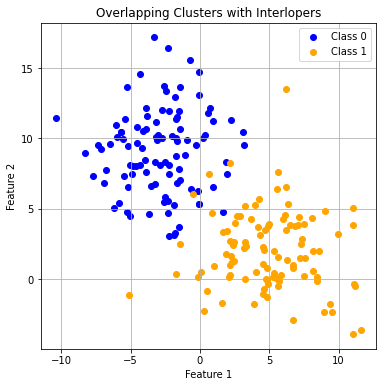

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate two overlapping clusters
X, y = make_blobs(n_samples=200, centers=2, cluster_std=3.0, random_state=42)

plt.figure(figsize=(6, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='orange', label='Class 1')
plt.title("Overlapping Clusters with Interlopers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


### Explanation:

- These are two clusters that overlap.
- The spread (`cluster_std=2.0`) ensures some intermixing ("interlopers").
- This is a realistic scenario where the decision boundary is **not obvious**.

Next, we will apply KNN and visualize its **decision boundary**.


/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


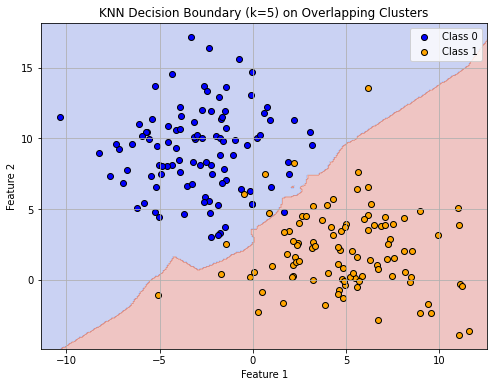

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# Fit KNN with k=5
k = 5
model = KNeighborsClassifier(n_neighbors=k)
model.fit(X, y)

# Create grid for decision boundary visualization
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 300),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 300)
)
grid_points = np.c_[xx.ravel(), yy.ravel()]
Z = model.predict(grid_points).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', edgecolor='k', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='orange', edgecolor='k', label='Class 1')
plt.title(f"KNN Decision Boundary (k={k}) on Overlapping Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


### Discussion:

- The contour plot shows how KNN **separates overlapping clusters**.
- KNN draws a **nonlinear boundary** shaped by the local density of neighbors.
- As expected, some points lie close to the boundary — these are “ambiguous” cases where neighbors are mixed.

---

This is why KNN works well when clusters are roughly compact and separated but can struggle when there is overlap.

✅ Now we’re ready for the exercise using `scikit-learn`'s `KNeighborsClassifier`.


# Exercise: Use Scikit-Learn’s Built-In KNeighborsClassifier

Now that we’ve implemented KNN manually, let’s practice using `scikit-learn`’s built-in `KNeighborsClassifier`.

You will:
- Import the class
- Create a model with `k=5`
- Fit it to the training data
- Predict class labels for new test points
- Plot the predictions

---

### 📚 Documentation:
- [KNeighborsClassifier Docs](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)


In [ ]:
# TODO: Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import _____  # ← fill in here

# TODO: Create a KNN model with k=5 neighbors
model = KNeighborsClassifier(_____)  # ← fill in here

## Step 2: Fit the KNN model

Just like other `scikit-learn` models:
- Use `.fit()` to train it on `(X, y)`.


In [ ]:
# TODO: Fit model on training data X, y
model._____  # ← fill in here


## Step 3: Predict class labels

We’ll now predict classes for our `test_points` defined earlier.


In [ ]:
# TODO: Predict using the model
predictions = model._____  # ← fill in here

print("Predicted classes:", predictions)


## Step 4: Visualize predictions

We will show predicted labels visually on the scatter plot.


In [ ]:
plt.figure(figsize=(6, 6))
plt.scatter(X[y==0, 0], X[y==0, 1], color='blue', label='Class 0')
plt.scatter(X[y==1, 0], X[y==1, 1], color='orange', label='Class 1')

# Plot test points with predicted label color
for i, point in enumerate(test_points):
    color = 'blue' if predictions[i] == 0 else 'orange'
    plt.scatter(point[0], point[1], color=color, edgecolor='k', marker='X', s=100, label=f'Test Point {i+1}' if i==0 else "")

plt.title("Scikit-Learn KNN Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


### ✅ Well Done!

You just used `scikit-learn`’s `KNeighborsClassifier`:
- Define the model
- Fit to training data
- Predict for new points
- Visualize the predictions

---

You can experiment further:
- Try different `k` values
- Plot decision boundaries
- Normalize features (important for KNN sensitivity to scale!)
